In [1]:
# Import Plotting Libaries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MultipleLocator

from skimage.transform import resize as sk_resize

# Import Standard Libaries
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#!pip3 install pickle5
import pickle5 as pickle
import time

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
# import pickle5 as pickle
with open('../WM-clean.pkl', "rb") as fh:
    data = pickle.load(fh)

In [3]:
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train


In [4]:
data.shape

(172950, 11)

In [5]:
# Get most frequent die size and shapes
print(data.groupby('dieSize').size().sort_values(ascending=False).head(10))
print(data.groupby('shape').size().sort_values(ascending=False).head(10))

dieSize
516.0     16437
533.0     14350
776.0     12400
562.0     11252
518.0      9400
741.0      8222
1109.0     7186
1414.0     6723
1376.0     6180
1060.0     5091
dtype: int64
shape
(25, 27)    18781
(26, 26)    14366
(30, 34)    12400
(29, 26)    11751
(27, 25)    10682
(39, 37)    10173
(33, 29)     8125
(42, 44)     6724
(44, 41)     6134
(41, 33)     5091
dtype: int64


In [6]:
def wafer_density(row, col, x, y):
    nonzeros = np.count_nonzero(row[col])
    pixels = row[x] * row[y]
    return nonzeros/pixels

data['density'] = data.apply (lambda row: wafer_density(row, 'waferMap', 'x_', 'y_'), axis=1)
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset,density
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,0.779167
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,0.779167
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167


In [7]:
lots = {x for x in data.lotName}
len(lots)

10762

In [8]:
lot_density = data.groupby('lotName').density.max().to_dict()
len(lot_density)

10762

In [9]:
data.density.loc[0] ==lot_density[data.lotName.loc[0]]

True

In [10]:
def find_corrupted(row, lot, density, dictionary):
    if row[density] == dictionary[row[lot]]:
        return 0
    else:
        return 1

data['is_corrupted'] = data.apply (lambda row: find_corrupted(row, 'lotName', 'density', lot_density), axis=1)
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset,density,is_corrupted
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,0.779167,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,0.779167,0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167,0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167,0


In [11]:
def corrupt_delta(row, lot, density, dictionary):
    return dictionary[row[lot]] - row[density]

data['corrupt_delta'] = data.apply (lambda row: corrupt_delta(row, 'lotName', 'density', lot_density), axis=1)
data.head()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset,density,is_corrupted,corrupt_delta
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167,0,0.0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,0.779167,0,0.0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test,0.779167,0,0.0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167,0,0.0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.779167,0,0.0


In [12]:
data.groupby('is_corrupted').count()

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset,density,corrupt_delta
is_corrupted,,,,,,,,,,,,,
0,160137,160137,160137,160137,160137,160137,160137,160137,160137,160137,160137,160137,160137
1,12813,12813,12813,12813,12813,12813,12813,12813,12813,12813,12813,12813,12813


In [13]:
corrupted = data[data.corrupt_delta > 0]
print(len(corrupted))
corrupted.head()

12813


,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset,density,is_corrupted,corrupt_delta
6554,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1176.0,lot1288,12.0,Edge-Loc,3,39,39,"(39, 39)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train,0.773176,1,0.003287
6556,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1176.0,lot1288,14.0,none,1,39,39,"(39, 39)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",dev,0.773176,1,0.003287
6724,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2979.0,lot1414,12.0,Donut,8,54,71,"(54, 71)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",train,0.776995,1,0.005999
6726,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2962.0,lot1417,12.0,Donut,8,54,71,"(54, 71)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",dev,0.772561,1,0.007303
6740,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2993.0,lot1419,3.0,Donut,8,54,71,"(54, 71)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",train,0.780647,1,0.004956


In [14]:
corrupted_lots = corrupted.lotName.unique()
print(corrupted_lots)
print(len(corrupted_lots))

['lot1288' 'lot1414' 'lot1417' ... 'lot47213' 'lot47214' 'lot47215']
1165


In [15]:
corrupted.groupby('lotName').size().sort_values(ascending=False).head(10)

lotName
lot45146    24
lot42760    24
lot42772    24
lot46996    24
lot47129    24
lot45141    24
lot45072    24
lot45147    24
lot45070    24
lot45150    24
dtype: int64

<AxesSubplot:>

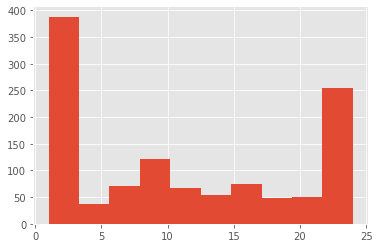

In [16]:
corrupted.groupby('lotName').size().sort_values(ascending=False).hist()

<AxesSubplot:>

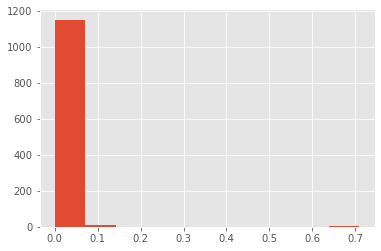

In [17]:
corrupted.groupby('lotName').corrupt_delta.max().hist()

In [18]:
trial = corrupted[corrupted.corrupt_delta > 0.1]
print(trial.lotName)
print(len(trial))

34396     lot40645
34826     lot40679
45572     lot41967
109448    lot44867
113489    lot45040
115486    lot45123
117873    lot45222
136868    lot46025
137697    lot46060
Name: lotName, dtype: object
9


In [19]:
trial2 = corrupted[corrupted.corrupt_delta > 0.05]
print(trial2.lotName)
print(len(trial2))

34396     lot40645
34826     lot40679
45572     lot41967
82268     lot43612
109448    lot44867
112434    lot44995
112660    lot45005
112955    lot45017
113229    lot45030
113375    lot45036
113463    lot45039
113489    lot45040
113616    lot45045
113639    lot45046
113727    lot45050
114280    lot45073
114340    lot45075
114418    lot45078
114714    lot45091
114826    lot45096
115020    lot45104
115111    lot45108
115486    lot45123
116336    lot45159
117342    lot45200
117504    lot45206
117873    lot45222
136868    lot46025
137697    lot46060
158780    lot46948
Name: lotName, dtype: object
30


In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage.transform import resize as sk_resize

from scipy import ndimage
import cv2

def plot_list_filter(df1, wafer_list, fig_size=(10, 10), filter_size=3, mfilter=False, filter_type='scipy',
                     img_dims=[30, 30], resize=False):
    """
    Helper function to plot entire lot of wafers from df1
    
    :param wafer_list: -> list | list of indices to plot
    :param fig_size: -> list [x,y] pixles to resize the image to
    :param filtersize: -> int to set median filter size
    :param mfilter -> bool | apply median filter if True
    :param filter_type -> str | method to use for median filtering ('scipy', 'cv', 'manual')
    """

    list_df = df1.iloc[wafer_list, :]
    list_df.reset_index(inplace=True)

    total_rows = len(list_df.index)
    ax_cnt = int(math.ceil(total_rows ** 1/2))

    fig, axs = plt.subplots(ax_cnt, ax_cnt, figsize=fig_size)
    fig.tight_layout()
    
    # make a color map of fixed colors - blue passing die, fuchsia failing die
    cm_xkcd = colors.XKCD_COLORS.copy()
    cmap = colors.ListedColormap(
        [cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

    # Nested for loops to loop through all digits and number of examples input for plotting
    for n_row in range(ax_cnt**2):
        if n_row < total_rows:
            img = list_df.waferMap[n_row]
            index = list_df["index"][n_row]
            ftype = list_df.failureType[n_row]
                
            if mfilter:
                if filter_type == 'scipy':
                    img = ndimage.median_filter(img, size=filter_size)
                elif filter_type == 'cv':
                    img = cv2.medianBlur(img, filter_size)
                elif filter_type == 'manual':
                    img = median_filter(img, filter_size)
            if resize:
                img = sk_resize(img, img_dims, 
                                order=0, preserve_range=True, anti_aliasing=False)
                
        else:
            img = np.zeros_like(list_df.waferMap[0])
            index = ''
            ftype = ''

        # imshow to plot image in axs i,j location in plot
        i = n_row % ax_cnt
        j = int(n_row/ax_cnt)
        axs[i, j].imshow(img,
                         cmap=cmap,
                         vmin=0, vmax=2)
        axs[i, j].axis('off')

        # label the figure with the index# and defect classification [for future reference]
        axs[i, j].set_title(f'{index}\n{ftype}', fontsize=10)

    plt.show()

In [18]:
wafers = [34396, 114412, 45572]

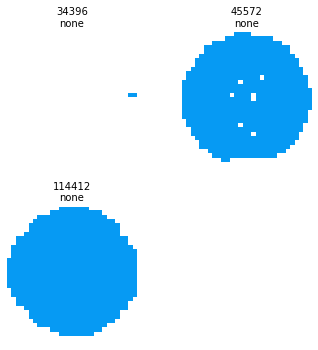

In [19]:
plot_list_filter(data, wafers, mfilter=True, fig_size=(5,5), resize=True)

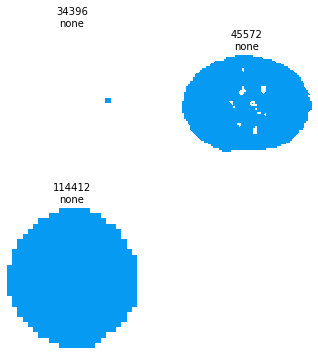

In [20]:
plot_list_filter(data, wafers, mfilter=True, fig_size=(5,5))

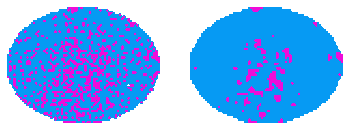

In [164]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
fig = plt.figure()

# make a color map of fixed colors - blue passing die, fuchsia failing die
cm_xkcd = colors.XKCD_COLORS.copy()
#cmap = colors.ListedColormap(['white', 'blue', 'yellow'])
cmap = colors.ListedColormap(
        [cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])


ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
example = data['waferMap'].loc[45562]
result = ndimage.median_filter(example, size=3)
ax1.imshow(example, cmap=cmap, vmin=0, vmax=2)
ax1.set_axis_off()
ax2.imshow(result, cmap=cmap, vmin=0, vmax=2)
ax2.set_axis_off()
plt.show()

In [175]:
def plot_list_filter(df1, wafer_list, fig_size=(10, 10), filter_size=3, mfilter=False, filter_type='scipy'):
    """
    Helper function to plot entire lot of wafers from df1
    
    :param lot: -> str | lotName that will be plotted e.g. 'lot1'
    :param fig_size: -> list [x,y] pixles to resize the image to
    :param filtersize: -> int to set median filter size
    :param mfilter -> bool | apply median filter if True
    :param filter_type -> str | method to use for median filtering ('scipy', 'cv', 'manual')
    """

    list_df = df1.iloc[wafer_list, :]
    list_df.reset_index(inplace=True)

    total_rows = len(list_df.index)
    ax_cnt = int(math.ceil(total_rows**(1/2)))


    fig, axs = plt.subplots(ax_cnt, ax_cnt, figsize=fig_size)
    fig.tight_layout()
    
    # make a color map of fixed colors - blue passing die, fuchsia failing die
    cm_xkcd = colors.XKCD_COLORS.copy()
    cmap = colors.ListedColormap(
        [cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

    # Nested for loops to loop through all digits and number of examples input for plotting
    for n_row in range(ax_cnt**2):
        if n_row < total_rows:
            img = list_df.waferMap[n_row]
            index = list_df["index"][n_row]
            ftype = list_df.failureType[n_row]
                
            if mfilter:
                if filter_type == 'scipy':
                    img = ndimage.median_filter(img, size=filter_size)
                elif filter_type == 'cv':
                    img = cv2.medianBlur(img, filter_size)
                elif filter_type == 'manual':
                    img = median_filter(img, filter_size)
                
        else:
            img = np.zeros_like(list_df.waferMap[0])
            index = ''
            ftype = ''

        # imshow to plot image in axs i,j location in plot
        i = n_row % ax_cnt
        j = int(n_row/ax_cnt)
        axs[i, j].imshow(img,
                         interpolation='none',
                         cmap=cmap, vmin=0, vmax=2)
        axs[i, j].axis('off')

        # label the figure with the index# and defect classification [for future reference]
        axs[i, j].set_title(f'{index}\n{ftype}', fontsize=10)

    plt.show()

In [178]:
wafers = [34396, 34826, 45572]

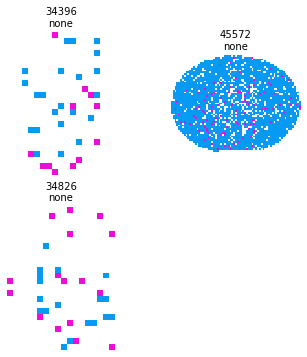

In [180]:
plot_list_filter(data, wafers, fig_size=(5,5), mfilter=False)

In [8]:
plot_lot_filter(data, 'lot41967', mfilter=True, filter_size=7)

NameError: name 'plot_lot_filter' is not defined

lot41967


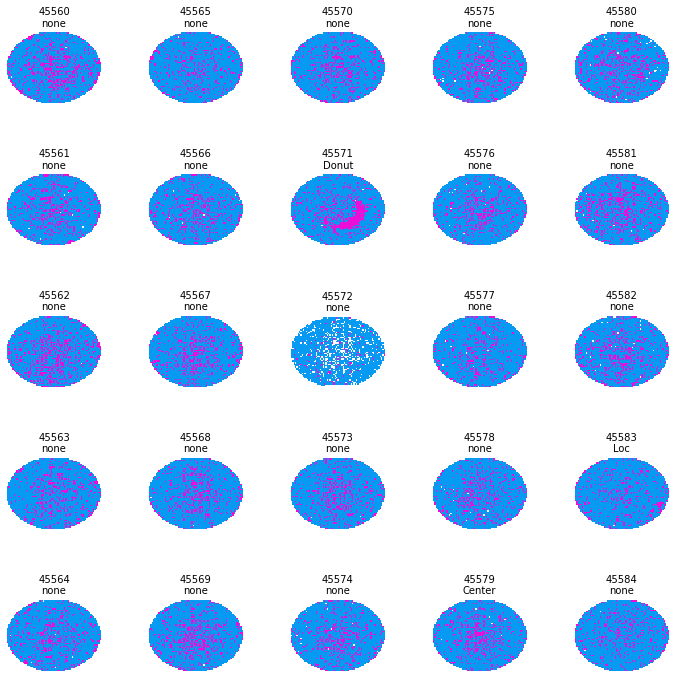

In [129]:
plot_lot_filter(data, 'lot41967')